# mapping solar flares

Most active regions, and therefore solar flares, occur in two narrow latitude bands on the Sun. Here we plot the location of all the solar flares observed by the Solar Dynamics Observatory. In this plot, the size of the dot correlates with the magnitude of the flare. To do this, we use the matplotlib [Basemap toolkit](https://matplotlib.org/basemap/api/basemap_api.html).

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

Read a csv file of flare magnitudes and locations into pandas dataframe:

In [2]:
url = 'https://raw.githubusercontent.com/mbobra/mapping-solar-flares/master/flares.csv'

In [3]:
df = pd.read_csv(url)

Now we plot the data. Since NOAA classifies flares according to their [X-Ray intensity](https://en.wikipedia.org/wiki/Solar_flare#Classification), we ascribe a yellow color to the least energetic class of flares, called C-class, and green and red to progressively more energetic flares. We then plot it on a low-resolution basemap, which is included by default in the matplotlib toolkit. To install a high-resolution basemap, use the command: 
`conda install -c conda-forge basemap-data-hires`.

In [4]:
plt.rcParams["figure.figsize"] = (20,20)

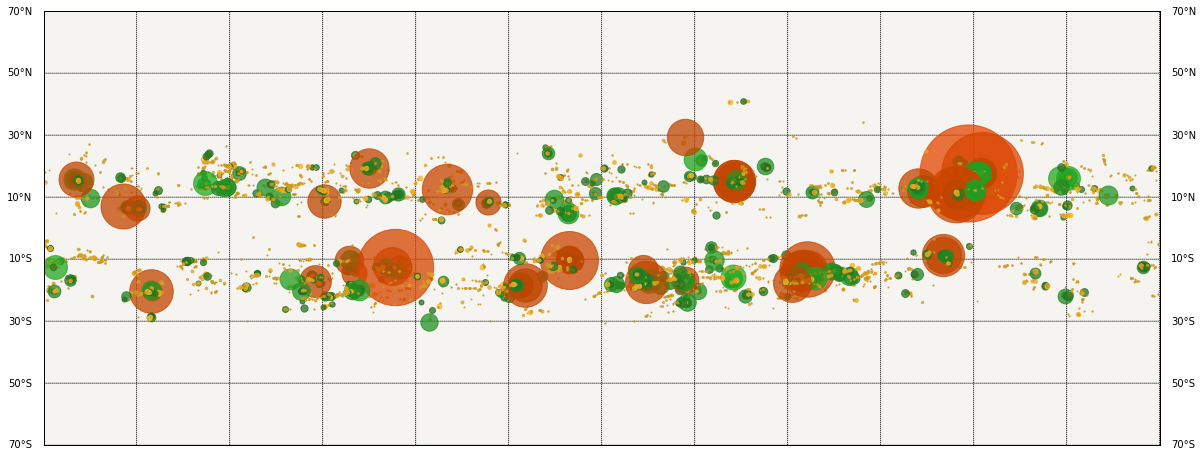

In [5]:
m = Basemap(resolution='l',projection='cyl', llcrnrlat=-70, urcrnrlat=70, llcrnrlon=0, urcrnrlon=360)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,90.,20.), labels = [True, True, True, True, True, True, True, True, True])
m.drawmeridians(np.arange(0.,360.,30.))
m.drawmapboundary(fill_color='#f5f4f0')

for i in range(len(df.index)):
    x, y = m(df.ix[i]['latitude'], df.ix[i]['longitude'])
    if (df.ix[i]['class'] == 'C'):
        factor = 1.
        plt.plot(x, y, 'o', markersize=np.power((1.0*df.ix[i]['level']),0.7), color=((np.round(((df.ix[i]['level']*5.5)+194)))/255., (np.round((df.ix[i]['level']*4)+145))/255., (np.round(df.ix[i]['level']+30))/255., 0.75))
    if (df.ix[i]['class'] == 'M'):
        factor = 1.
        plt.plot(x, y, 'o', markersize=np.power((10.0*df.ix[i]['level']),0.7), color=(34/255., (np.round((df.ix[i]['level']*7)+104))/255., 34/255., 0.75))
    if (df.ix[i]['class'] == 'X'):
        factor = 1.
        plt.plot(x, y, 'o', markersize=np.power((100.0*df.ix[i]['level']),0.7), color=((np.round(((df.ix[i]['level']*7)+180)))/255., 69/255., 0/255., 0.75))

plt.show()